<a href="https://colab.research.google.com/github/OBIGOD3931/Basic-model/blob/master/Copy_of_feature_selection_share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
t

# Feature Engineering And  Data Preprocessing
   



In [ ]:
from google.colab import files
uploads = files.upload()

Saving terrorism.csv to terrorism.csv


In [ ]:
# importing required libraries
import pandas as pd # data manipulation and processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # data visualisation
import holidays
from sklearn.feature_selection import RFE, SelectKBest, f_classif, chi2,mutual_info_classif, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multioutput import ClassifierChain
from xgboost import XGBClassifier, plot_importance
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# to show all the columns
pd.set_option("display.max_columns", None)
# create default plot settings
plt.rc(
    "figure",
    autolayout=True,
    figsize=(15, 8),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)


In [ ]:
terr = pd.read_csv("terrorism.csv", parse_dates=["date"], index_col="date")

In [ ]:
terr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5998 entries, 1976-02-13 to 2021-06-30
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            5998 non-null   int64  
 1   month           5998 non-null   object 
 2   day             5998 non-null   object 
 3   extended        5998 non-null   int64  
 4   state           5998 non-null   object 
 5   city            5998 non-null   object 
 6   latitude        5998 non-null   float64
 7   longitude       5998 non-null   float64
 8   multiple        5998 non-null   int64  
 9   success         5998 non-null   int64  
 10  suicide         5998 non-null   int64  
 11  attack_type     5998 non-null   object 
 12  target_type     5998 non-null   object 
 13  target_subtype  5998 non-null   object 
 14  corp            5998 non-null   object 
 15  target          5998 non-null   object 
 16  nationality     5998 non-null   object 
 17  group_name     

In [ ]:
terr.head()

,year,month,day,extended,state,city,latitude,longitude,multiple,success,suicide,attack_type,target_type,target_subtype,corp,target,nationality,group_name,gun_certain,weapon_type,weapon_subtype,no_killed,no_wounded
date,,,,,,,,,,,,,,,,,,,,,,,
1976-02-13,1976,Feb,Fri,0,Lagos,Lagos,6.452331,3.419044,0,1,0,Assassination,Government (General),Head of State,Government of Nigeria,4th Head of State: General Murtala Ramat Mohammed,Nigeria,Coup plotters,0,Firearms,Automatic or Semi-Automatic Rifle,3,1
1980-01-17,1980,Jan,Thu,0,Kaduna,Kaduna,10.530204,7.437338,0,1,0,Unknown,Government (Diplomatic),Embassy/Consulate,Unknown,Consulate,Great Britain,Zimbabwe Patriotic Front,0,Unknown,Unknown Weapon Type,0,0
1983-11-11,1983,Nov,Fri,0,Unknown,Unknown,0.000000,0.000000,0,0,0,Assassination,Government (General),Politician or Political Party Movement/Meeting...,Nigeria,"Senator Girgiri Lawan, Senator of ruling Natio...",Nigeria,Unknown,0,Unknown,Unknown Weapon Type,0,1
1983-11-27,1983,Nov,Sun,0,Lagos,Lagos,6.618911,3.305532,0,1,0,Assassination,Government (General),"Government Personnel (excluding police, military)",Nigerian Ports Authority,"Chief Joe Nkpang, Assistant general Manager",Nigeria,Gang,0,Unknown,Unknown Weapon Type,1,0
1983-11-29,1983,Nov,Tue,0,Lagos,Lagos,6.455641,3.429865,0,0,0,Assassination,Government (General),Government Building/Facility/Office,Nigerian Federal House of Representatives,"Chief Edwin Ume-Ezeoke, former speaker",Nigeria,Unknown,0,Firearms,Unknown Gun Type,0,1


Some new columns are going to be engineered from this data set. Potential columns we can engineer new features from are:
* The geopolitical region for each column can be engineered from the state column. There are setting kind of crimes perculiar to the different geopolitical zones so this can be informative.
* A column to identify whether a given crime took place during a public holiday can be can extracted from the index of the data which is a datetime index.
* A column to identify whether a given crime was committed during the weekdays or the weekend can be engineered from the index too.

For now this are the 3 new columns that will be added. There's also potential to engineer a column to identify whether a crime took place during September to December vs other months. The whole "ember" month thing in Nigeria but the new columns already created will do for now.

In [ ]:
geopolitical_zones = {"North Central": ["Benue", "Kogi", "Kwara", "Nasawara", "Niger", "Plateau"],
                      "North East": ["Adamawa", "Bauchi", "Borno", "Gombe", "Taraba", "Yobe"],
                      "North West" : ["Jigawa", "Kaduna", "Kano", "Katsina", "Kebbi", "Sokoto", "Zamfara"],
                      "South East" : ["Abia", "Anambra", "Ebonyi", "Enugu", "Imo"],
                      "South South": ["Akwa Ibom", "Bayelsa", "Cross River", "Delta", "Edo", "Rivers"],
                      "South West": ["Ekiti", "Lagos", "Ogun", "Ondo", "Osun", "Oya"]}

In [ ]:
# always important to add type hints to your functions
# tells what argument type the function takes and what type the function returns

def is_holiday(df_:pd.DataFrame) -> pd.DataFrame:
    """
    Function that adds a holiday column to the dataframe
    """

    # create a holiday DataFrame
    hols = []
    for i in range(1979, 2022):
        holiday =  pd.DataFrame([holidays.Nigeria(years=[i]).keys(), holidays.Nigeria(years=[i]).values()]).T
        holiday.columns = ["date", "holiday"]

        hols.append(holiday)


    all_hols = pd.concat(hols)
    dates = all_hols.date.to_list()

    return(df_
           .assign(is_holiday = df_.index)
           # calling assign a second time because the same argument is_holiday is passed in both calls
           .assign(is_holiday = lambda df_: df_.is_holiday
                   .apply(lambda x: 1 if x.date() in dates else 0 )
                  )
          )



In [ ]:
def clean_terr(df_: pd.DataFrame) -> pd.DataFrame:
    """
    Function to add new columns to the dataframe
    """
    return (terr
             .assign(isweekday = terr.index.weekday)
             .assign(isweekday = lambda df_: df_.isweekday.apply(lambda x: 0 if x >= 5 else 1),
                     # state column exists in original dataframe so no need for lambda df_ call here
                     region = terr.state.apply(lambda x: "North West" if x in geopolitical_zones["North West"]
                                                           else "North East" if x in geopolitical_zones["North East"]
                                                           else "North Central" if x in geopolitical_zones["North Central"]
                                                           else "South East" if x in geopolitical_zones["South East"]
                                                           else "South West" if x in geopolitical_zones["South West"]
                                                           else "South South")
                    )
             .pipe(is_holiday) # pipe method is used to apply the is_holiday function
             .query("state != 'Unknown' & attack_type != 'Unknown'") # query method filters the data
            )

In [ ]:
terr_req = clean_terr(terr)

In [ ]:
terr_req.head()

,year,month,day,extended,state,city,latitude,longitude,multiple,success,suicide,attack_type,target_type,target_subtype,corp,target,nationality,group_name,gun_certain,weapon_type,weapon_subtype,no_killed,no_wounded,isweekday,region,is_holiday
date,,,,,,,,,,,,,,,,,,,,,,,,,,
1976-02-13,1976,Feb,Fri,0,Lagos,Lagos,6.452331,3.419044,0,1,0,Assassination,Government (General),Head of State,Government of Nigeria,4th Head of State: General Murtala Ramat Mohammed,Nigeria,Coup plotters,0,Firearms,Automatic or Semi-Automatic Rifle,3,1,1,South West,0
1983-11-27,1983,Nov,Sun,0,Lagos,Lagos,6.618911,3.305532,0,1,0,Assassination,Government (General),"Government Personnel (excluding police, military)",Nigerian Ports Authority,"Chief Joe Nkpang, Assistant general Manager",Nigeria,Gang,0,Unknown,Unknown Weapon Type,1,0,0,South West,0
1983-11-29,1983,Nov,Tue,0,Lagos,Lagos,6.455641,3.429865,0,0,0,Assassination,Government (General),Government Building/Facility/Office,Nigerian Federal House of Representatives,"Chief Edwin Ume-Ezeoke, former speaker",Nigeria,Unknown,0,Firearms,Unknown Gun Type,0,1,1,South West,0
1988-01-23,1988,Jan,Sat,0,Lagos,Lagos,6.618911,3.305532,0,1,0,Assassination,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Libya State Dept,Charge Aboubaker,Libya,Unknown,0,Firearms,Handgun,1,0,0,South West,0
1988-03-13,1988,Mar,Sun,0,Lagos,Lagos,6.618911,3.305532,0,1,0,Assassination,Educational Institution,Teacher/Professor/Instructor,Language Teachers Based out of Saudi Embassy*,Teachers,Saudi Arabia,Unknown,0,Firearms,Handgun,3,0,0,South West,0


In [ ]:
print("Number of Unique Values in Features")
print("====================================")
for col in terr_req.select_dtypes(include=["object"]).columns:
    print(col, f": {terr_req[col].unique().shape[0]}")
    print("====================================")

Number of Unique Values in Features
month : 12
day : 7
state : 37
city : 2536
attack_type : 8
target_type : 19
target_subtype : 90
corp : 2189
target : 1867
nationality : 37
group_name : 70
weapon_type : 7
weapon_subtype : 26
region : 6


## Data Preprocessing

In [ ]:
def label_encoder_transformer(X: pd.DataFrame) -> (pd.DataFrame, dict):
    """Function to transform dataframe values using Labelencoder"""
    cols = X.select_dtypes(include=["object"]).columns
    encoder_dict = {}

    for col in cols:
        encoder = LabelEncoder()
        X[col] = encoder.fit_transform(X[col])
        # important to create a dictionary containing the encoder for the different  columns
        encoder_dict[col] = encoder

    return X, encoder_dict

In [ ]:
# removing the target columns as well as columns that won't be useful to the model
X = terr_req.copy().drop(["attack_type", "target", "state", "city", "year"], axis=1)
y = terr_req.copy()[["attack_type", "state"]]


y, y_encoder_dict = label_encoder_transformer(y)

ohe = OneHotEncoder()
minmax = MinMaxScaler()

num_cols =  X.select_dtypes(exclude=["object"]).columns.drop(["longitude", "latitude"])
cat_cols = X.select_dtypes(include=["object"]).columns

col_transformer = ColumnTransformer([
    ("cat_cols", ohe, cat_cols),
    ("num_cols", minmax, num_cols)
], remainder="passthrough")

X = col_transformer.fit_transform(X)

In [ ]:
X

<5679x2474 sparse matrix of type '<class 'numpy.float64'>'
	with 87193 stored elements in Compressed Sparse Row format>

As mentioned ealier about the high dimensionality. The preprocessed data has 2545 columns.

In [ ]:
pd.DataFrame(X.todense(), columns = col_transformer.get_feature_names_out()).head()

cat_cols__month_Apr  cat_cols__month_Aug  cat_cols__month_Dec  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   cat_cols__month_Feb  cat_cols__month_Jan  cat_cols__month_Jul  \
0                  1.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  1.0                  0.0   
4                  0.0                  0.0                  0.0   

   cat_cols__month_Jun  cat_cols__month_Mar  cat_cols__month_May  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  1.0                  0.0   

   cat_cols__month_Nov  cat_cols__month_Oct  cat_cols__month_Sep  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  1.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   cat_cols__day_Fri  cat_cols__day_Mon  cat_cols__day_Sat  cat_cols__day_Sun  \
0                1.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                1.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                1.0                0.0   
4                0.0                0.0                0.0                1.0   

   cat_cols__day_Thu  cat_cols__day_Tue  cat_cols__day_Wed  \
0                0.0                0.0                0.0   
1                0.0                0.0                0.0   
2                0.0                1.0                0.0   
3                0.0                0.0                0.0   
4                0.0                0.0                0.0   

   cat_cols__target_type_Airports & Aircraft  cat_cols__target_type_Business  \
0                                        0.0                             0.0   
1                                        0.0                             0.0   
2                                        0.0                             0.0   
3                                        0.0                             0.0   
4                                        0.0                             0.0   

   cat_cols__target_type_Educational Institution  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            1.0   

   cat_cols__target_type_Government (Diplomatic)  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            1.0   
4                                            0.0   

   cat_cols__target_type_Government (General)  \
0                                         1.0   
1                                         1.0   
2                                         1.0   
3                                         0.0   
4                                         0.0   

   cat_cols__target_type_Journalists & Media  cat_cols__target_type_Maritime  \
0                        

In [ ]:
y.head()

,attack_type,state
date,,
1976-02-13,1,24
1983-11-27,1,24
1983-11-29,1,24
1988-01-23,1,24
1988-03-13,1,24


In [ ]:
y_encoder_dict["state"].inverse_transform([5])

array(['Bauchi'], dtype=object)

The reason each encoder was stored in a dictionary with the column name, so that each integer value can be transformed back to the original value easily.

In [ ]:
# splitting the data into train and test set
# By default 25% of the data is used for the test set although you can change it with the size argument
# X_train, X_test, y_train, y_test = train_test_split(X, y, size=0.2) to use 20% as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4259, 2474)
(1420, 2474)
(4259, 2)
(1420, 2)


## Training and Evaluating Different Models

`Scikit-learn` currently has no metric for evaluating multi target classification problems so a custom evaluator had to be created.

In [ ]:
def evaluate_multi_output_model(test: pd.DataFrame, preds: np.array) -> pd.Series:
    """
    Function to evaluate accuracy of multi output models
    """
    eval_ = (pd.concat([test, pd.DataFrame(preds, columns=["attack_type_pred", "state_pred"], index=test.index)], axis=1)
             .assign(correct_state = lambda df: df["state"]==df["state_pred"],
                     correct_attack = lambda df: df["attack_type"]==df["attack_type_pred"],
                     correct_pred = lambda df: (df["attack_type"]==df["attack_type_pred"]) & (df["state"]==df["state_pred"])
                    )
            )

    return pd.Series([eval_.correct_state.sum()/test.shape[0],
                      eval_.correct_attack.sum()/test.shape[0],
                      eval_.correct_pred.sum()/test.shape[0]],
                    index = ["state prediction accuracy", "attack type prediction accuracy", "overall accuracy"]
                    )

In [ ]:
# training a random forest model
# MultiOutputClassifier class is used because there are two targets to predict
rf = RandomForestClassifier(random_state=1)
multi_rf = MultiOutputClassifier(rf)
multi_rf.fit(X_train, y_train)
rf_train_preds = multi_rf.predict(X_train)
rf_test_preds = multi_rf.predict(X_test)

In [ ]:
# training xgb model
xgb = XGBClassifier(random_state=1)
multi_xg = MultiOutputClassifier(xgb)
multi_xg.fit(X_train, y_train)
xgb_train_preds= multi_xg.predict(X_train)
xgb_test_preds= multi_xg.predict(X_test)

In [ ]:
# training logistic regression model
linear_model = LogisticRegression(solver="newton-cg")
multi_lr = MultiOutputClassifier(linear_model)
multi_lr.fit(X_train, y_train)
lr_train_preds = multi_lr.predict(X_train)
lr_test_preds = multi_lr.predict(X_test)

In [ ]:
# training a naive bayes model
nb = MultinomialNB()
multi_nb = MultiOutputClassifier(nb)
multi_nb.fit(X_train, y_train)
nb_train_preds = multi_nb.predict(X_train)
nb_test_preds = multi_nb.predict(X_test)

### Evaluation

In [ ]:
train_preds = [rf_train_preds, xgb_train_preds, lr_train_preds, nb_train_preds]
test_preds = [rf_test_preds, xgb_test_preds, lr_test_preds, nb_test_preds]
names = ["random forest", "xgboost", "logistic regression", "naive bayes"]

for train_pred, test_pred, name in zip(train_preds, test_preds, names):
    print(name)
    print("==========================")
    print()
    print("Training set performance :")
    print("--------------------------")
    print(evaluate_multi_output_model(y_train, train_pred))
    print()
    print("Test set performance :")
    print("--------------------------")
    print(evaluate_multi_output_model(y_test, test_pred))
    print("==========================")
    print()


random forest

Training set performance :
--------------------------
state prediction accuracy          1.0
attack type prediction accuracy    1.0
overall accuracy                   1.0
dtype: float64

Test set performance :
--------------------------
state prediction accuracy          0.819718
attack type prediction accuracy    0.869014
overall accuracy                   0.719718
dtype: float64

xgboost

Training set performance :
--------------------------
state prediction accuracy          1.000000
attack type prediction accuracy    0.997417
overall accuracy                   0.997417
dtype: float64

Test set performance :
--------------------------
state prediction accuracy          0.985211
attack type prediction accuracy    0.876056
overall accuracy                   0.864085
dtype: float64

logistic regression

Training set performance :
--------------------------
state prediction accuracy          0.983329
attack type prediction accuracy    0.904438
overall accuracy            

All of the models are clearly overfitting. There is a significant difference between the train set accuracy and the test set accuracy. There are methods to handle overfitting like cross validation but that's outside the scope of this project. The main goal is to extract the feature importance and see what features are necessary to the model.

### Extracting Feature Importance.
To extract feature importance label encoder has to be used to preserve the names of the features.

In [ ]:
X_2 = terr_req.copy().drop(["attack_type", "target", "state", "city", "year"], axis=1)

X_2, X_encoder_dict = label_encoder_transformer(X_2)

In [ ]:
X_train2, X_test2 = train_test_split(X_2, random_state=0)

In [ ]:
print(X_train2.shape)
print(X_train2.shape)
print(sum(X_train2.index == y_train.index))

(4259, 21)
(4259, 21)
4259


In [ ]:
# training second random forest model
rf2 = RandomForestClassifier(random_state=1)
multi_rf2 = MultiOutputClassifier(rf2)
multi_rf2.fit(X_train2, y_train)
rf_train_preds2= multi_rf2.predict(X_train2)
rf_test_preds2= multi_rf2.predict(X_test2)

In [ ]:
xgb2 = XGBClassifier(random_state=1)
multi_xgb2 = MultiOutputClassifier(xgb2)
multi_xgb2.fit(X_train2, y_train)
xgb_train_preds2= multi_xgb2.predict(X_train2)
xgb_test_preds2= multi_xgb2.predict(X_test2)

In [ ]:
## checking Label encoder evluation
train_preds2 = [rf_train_preds2, xgb_train_preds2]
test_preds2 = [rf_test_preds2, xgb_test_preds2]
names2 = ["random forest", "xgboost"]
for train_pred, test_pred, name in zip(train_preds2, test_preds2, names2):
    print(name)
    print("==========================")
    print()
    print("Training set performance :")
    print("--------------------------")
    print(evaluate_multi_output_model(y_train, train_pred))
    print()
    print("Test set performance :")
    print("--------------------------")
    print(evaluate_multi_output_model(y_test, test_pred))
    print("==========================")
    print()


random forest

Training set performance :
--------------------------
state prediction accuracy          1.0
attack type prediction accuracy    1.0
overall accuracy                   1.0
dtype: float64

Test set performance :
--------------------------
state prediction accuracy          0.965493
attack type prediction accuracy    0.884507
overall accuracy                   0.856338
dtype: float64

xgboost

Training set performance :
--------------------------
state prediction accuracy          1.00000
attack type prediction accuracy    0.99953
overall accuracy                   0.99953
dtype: float64

Test set performance :
--------------------------
state prediction accuracy          0.985211
attack type prediction accuracy    0.884507
overall accuracy                   0.871831
dtype: float64



Random Forest and Xgboost model benefitted from LabelEncoding.

### Random Forest Feature Importance

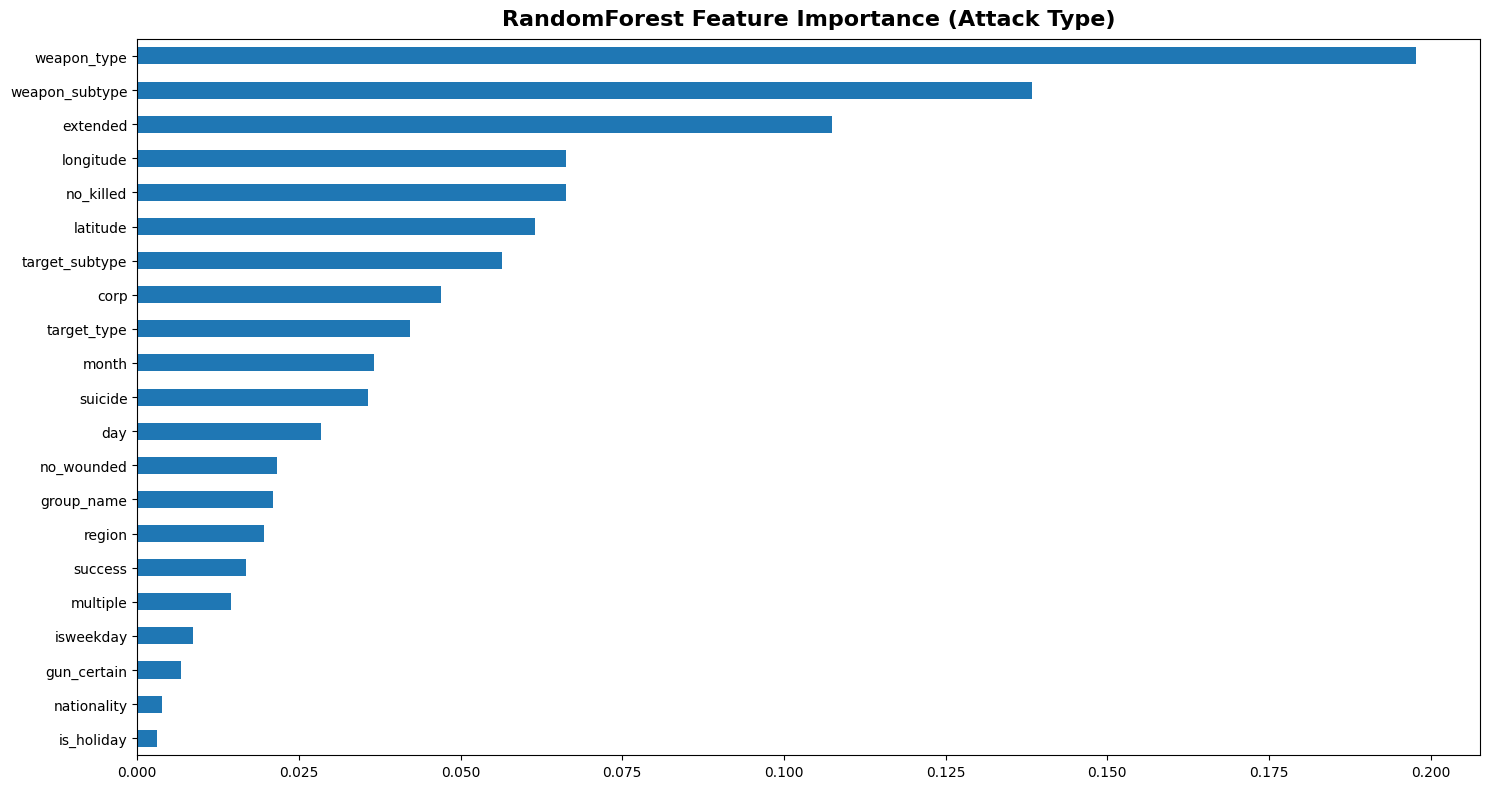

In [ ]:
# feature iportance random forest first estimator
fig, ax = plt.subplots()
pd.Series(
    multi_rf2.estimators_[0].feature_importances_,
    index = multi_rf2.estimators_[0].feature_names_in_
).sort_values().plot.barh(ax=ax)

plt.title("RandomForest Feature Importance (Attack Type)")
plt.show()

Weapon type, weapon subtype were the most important features in predicting attack type, the longitude and lattitude was also important which means there is a relationship between the locations and the type of attacks. The number of people killed was also an important feature

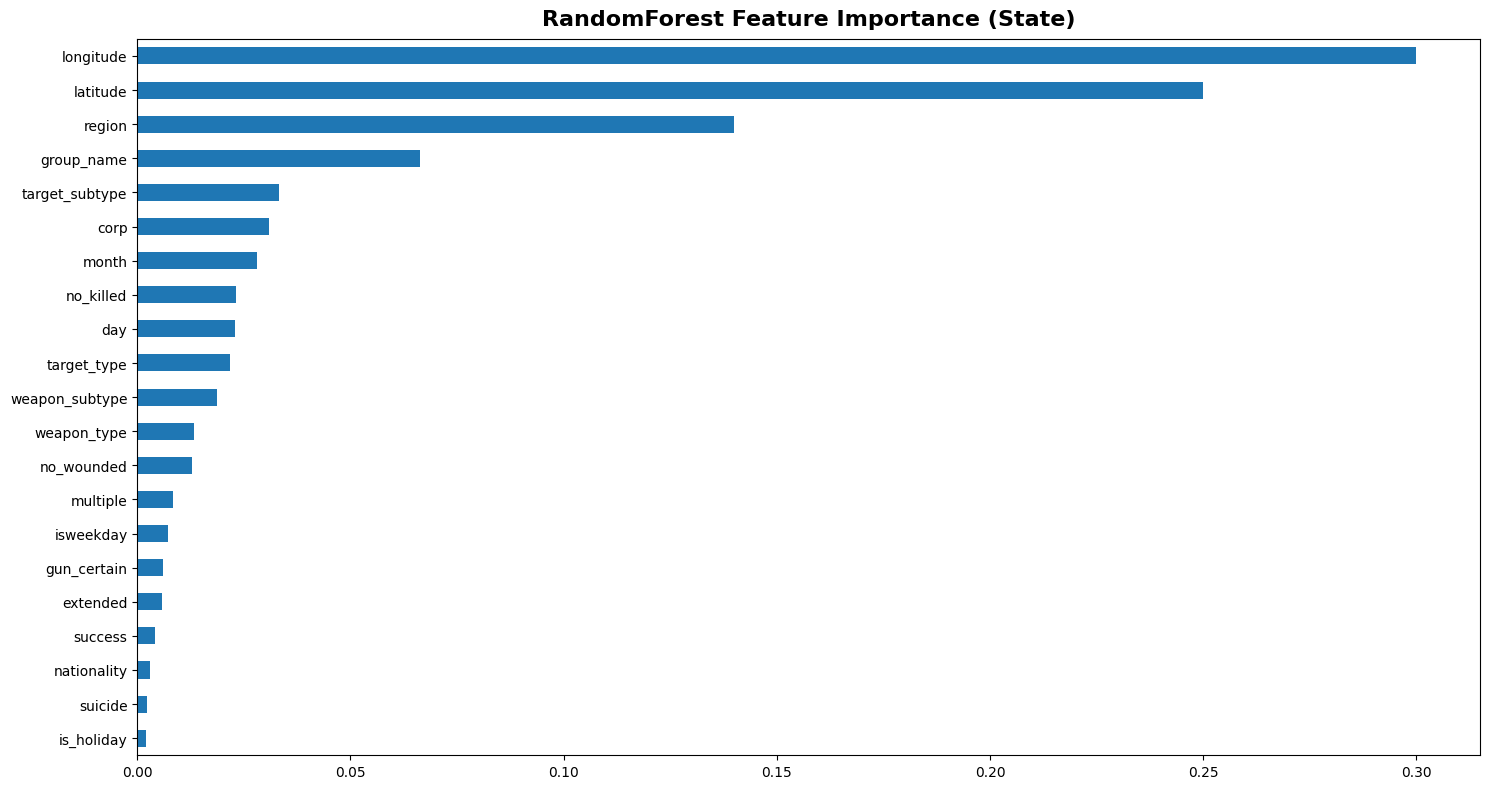

In [ ]:
# feature importance random forest second estimator
fig, ax = plt.subplots()
pd.Series(
    multi_rf2.estimators_[1].feature_importances_,
    index = multi_rf2.estimators_[1].feature_names_in_
).sort_values().plot.barh(ax=ax)

plt.title("RandomForest Feature Importance (State)")
plt.show()

For the state prediction, the latitude, longitude and region were the most important, it comes as no surprise as these features hold so much data about the states. The group name and the target subtype were also kind of important, eluding that the crime group and the kind of targets they go after is perculiar to specific states.

### Xgboost Feature Importance

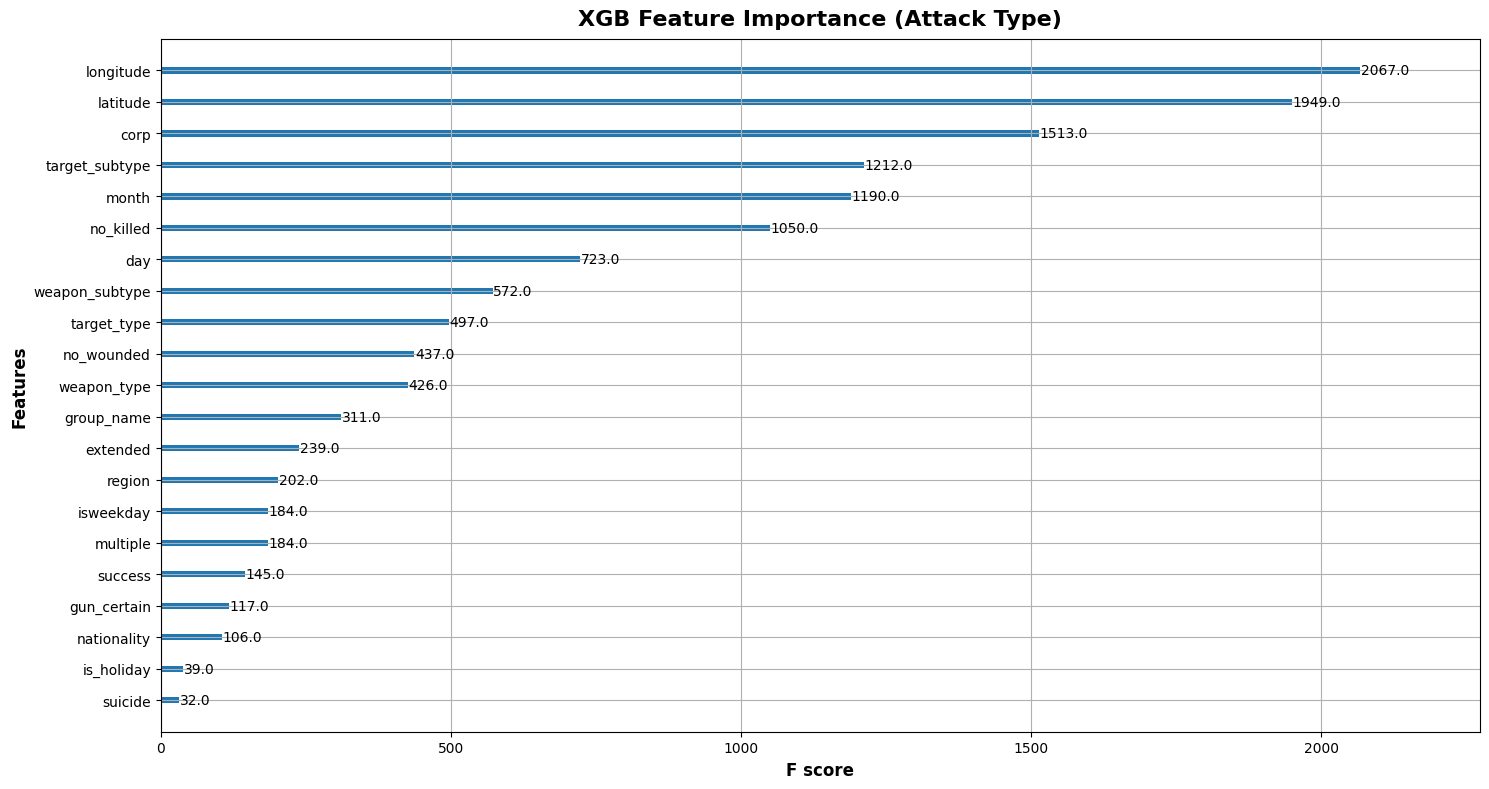

In [ ]:
# feature importance for xgboost first model
fig, ax = plt.subplots()
plot_importance(multi_xgb2.estimators_[0], ax=ax)
plt.title("XGB Feature Importance (Attack Type)")
plt.show()

Although both the xgboost and random forest predicted the attack type with similar accuracy, their feature importances are different. For the xgboost model, instead of weapon type and weapon subtype, the longitude and latitude were the most important features reinforcing what was discovered earlier that there is a strong relationship between the attack types and location. The corporation the targets belong to, the month, the target subtype and the number of people killed were also important features.

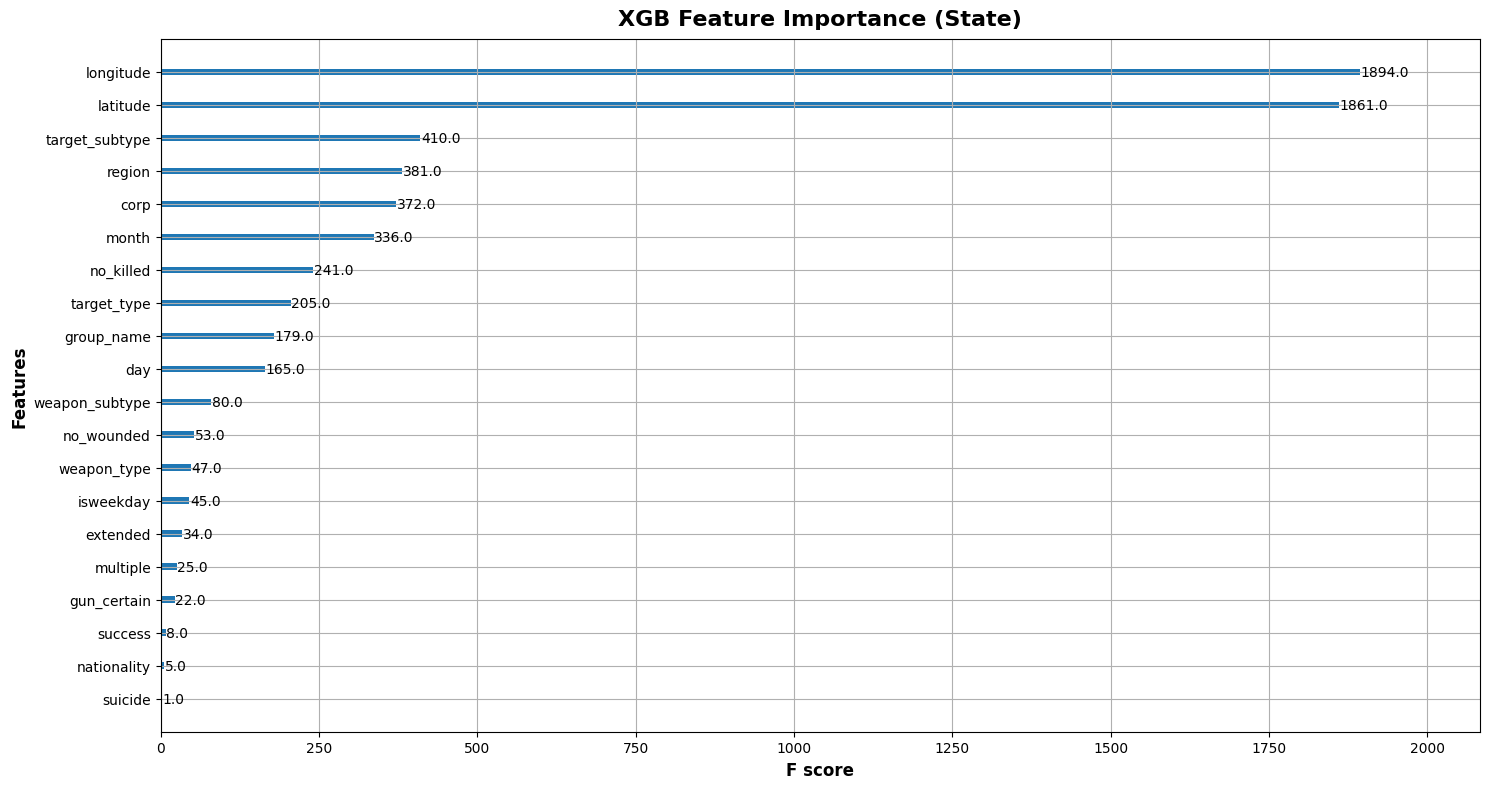

In [ ]:
fig, ax = plt.subplots()
plot_importance(multi_xgb2.estimators_[1], ax=ax)
plt.title("XGB Feature Importance (State)")
plt.show()

The feature importance from the xgboost model is almost similar to that of the random forest. Longitute, latitude and region the normal suspects and then there is the month which is weird and then the target subtype.

### Confusion Matrix and Classification Report.

### Xgboost Classification Report

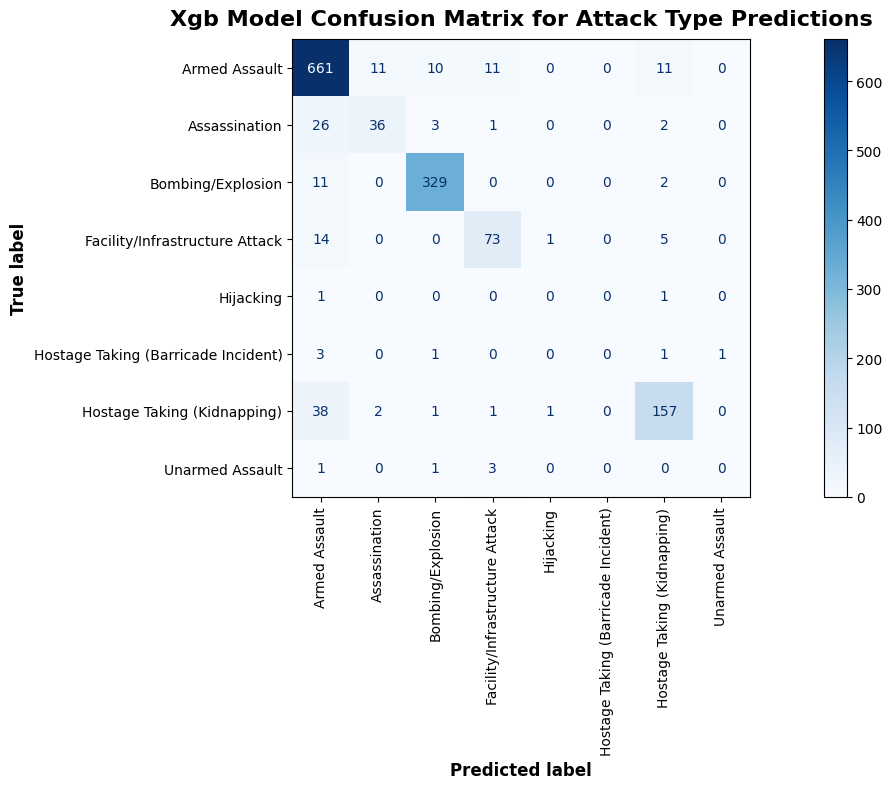

In [ ]:
# confusion matrix showing model predictions for attack_type
attack_labels = list(y_encoder_dict["attack_type"].inverse_transform(multi_xgb2.estimators_[0].classes_))

fig, ax = plt.subplots()
ConfusionMatrixDisplay(
    confusion_matrix(y_test.iloc[:, 0], xgb_test_preds2[:, 0])
    , display_labels=attack_labels
    ).plot(cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
plt.title("Xgb Model Confusion Matrix for Attack Type Predictions")
plt.show()

The diagonal line shows how well the xgboost model predicted each class correctly. The model predicted armed assault correctly 661 times and it predicted assaniation correctly 36 times.  The values in each column shows where the model confused different classes. The model confused an unarmed assault for armed assault 1 time and hostage taking(kidnapping) for armed assault 38 times although it can be forgiven for this one.

In [ ]:
# classification report for attack_type predictions
print(classification_report(
    y_encoder_dict["attack_type"].inverse_transform(y_test.iloc[:, 0]),
    y_encoder_dict["attack_type"].inverse_transform(xgb_test_preds2[:, 0]),
    zero_division = 0.0
    )
)

                                     precision    recall  f1-score   support

                      Armed Assault       0.88      0.94      0.91       704
                      Assassination       0.73      0.53      0.62        68
                  Bombing/Explosion       0.95      0.96      0.96       342
     Facility/Infrastructure Attack       0.82      0.78      0.80        93
                          Hijacking       0.00      0.00      0.00         2
Hostage Taking (Barricade Incident)       0.00      0.00      0.00         6
        Hostage Taking (Kidnapping)       0.88      0.79      0.83       200
                    Unarmed Assault       0.00      0.00      0.00         5

                           accuracy                           0.88      1420
                          macro avg       0.53      0.50      0.51      1420
                       weighted avg       0.88      0.88      0.88      1420



The model was pretty bad at predicting certain classes such as hijacking, unarmed assault and hostage taking(Barricade Incident). This is probably because these kind of attacks weren't common in the dataset. it did especially well in predicting Armed assault, bombing/explosion

In [ ]:
# classification report for state predictions
print(classification_report(
    y_encoder_dict["state"].inverse_transform(y_test.iloc[:, 1]),
    y_encoder_dict["state"].inverse_transform(xgb_test_preds2[:, 1]),
    zero_division = 0.0
    )
)

              precision    recall  f1-score   support

        Abia       1.00      0.83      0.91         6
       Abuja       1.00      0.93      0.97        15
     Adamawa       0.96      1.00      0.98        73
   Akwa Ibom       0.94      0.94      0.94        17
     Anambra       1.00      1.00      1.00        12
      Bauchi       0.95      1.00      0.97        18
     Bayelsa       0.97      1.00      0.99        33
       Benue       1.00      1.00      1.00        96
       Borno       0.99      0.99      0.99       516
 Cross River       0.80      0.80      0.80         5
       Delta       0.96      0.96      0.96        56
      Ebonyi       1.00      0.90      0.95        10
         Edo       0.93      1.00      0.97        14
       Ekiti       1.00      1.00      1.00         2
       Enugu       0.93      1.00      0.97        14
       Gombe       1.00      1.00      1.00        18
         Imo       0.94      1.00      0.97        16
      Jigawa       1.00    

For the state predictions the xgboost model was nigh perfect.

### Random Forest Classification Report

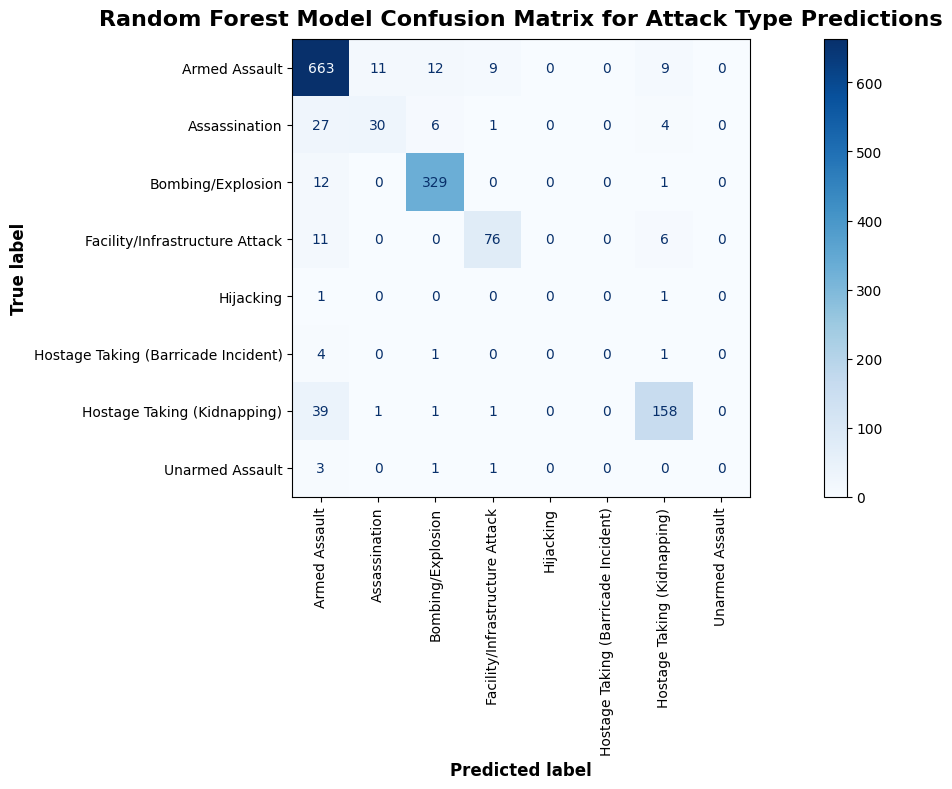

In [ ]:
attack_labels_rf = list(y_encoder_dict["attack_type"].inverse_transform(multi_rf2.estimators_[0].classes_))

fig, ax = plt.subplots()
ConfusionMatrixDisplay(
    confusion_matrix(y_test.iloc[:, 0], rf_test_preds2[:, 0])
    , display_labels=attack_labels_rf
    ).plot(cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
plt.title("Random Forest Model Confusion Matrix for Attack Type Predictions")
plt.show()

The random forest model has very similar performance to the xgboost model in predicting different classes.

In [ ]:
# classification report for attack_type predictions
print(classification_report(
    y_encoder_dict["attack_type"].inverse_transform(y_test.iloc[:, 0]),
    y_encoder_dict["attack_type"].inverse_transform(rf_test_preds2[:, 0]),
    zero_division = 0.0
    )
)

                                     precision    recall  f1-score   support

                      Armed Assault       0.87      0.94      0.91       704
                      Assassination       0.71      0.44      0.55        68
                  Bombing/Explosion       0.94      0.96      0.95       342
     Facility/Infrastructure Attack       0.86      0.82      0.84        93
                          Hijacking       0.00      0.00      0.00         2
Hostage Taking (Barricade Incident)       0.00      0.00      0.00         6
        Hostage Taking (Kidnapping)       0.88      0.79      0.83       200
                    Unarmed Assault       0.00      0.00      0.00         5

                           accuracy                           0.88      1420
                          macro avg       0.53      0.49      0.51      1420
                       weighted avg       0.87      0.88      0.88      1420



In [ ]:
# classification report for attack_type predictions
print(classification_report(
    y_encoder_dict["state"].inverse_transform(y_test.iloc[:, 1]),
    y_encoder_dict["state"].inverse_transform(rf_test_preds2[:, 1]),
    zero_division = 0.0
    )
)

              precision    recall  f1-score   support

        Abia       0.83      0.83      0.83         6
       Abuja       0.93      0.87      0.90        15
     Adamawa       0.96      0.99      0.97        73
   Akwa Ibom       0.87      0.76      0.81        17
     Anambra       0.92      1.00      0.96        12
      Bauchi       1.00      1.00      1.00        18
     Bayelsa       0.97      1.00      0.99        33
       Benue       1.00      1.00      1.00        96
       Borno       0.99      0.99      0.99       516
 Cross River       0.00      0.00      0.00         5
       Delta       0.95      0.96      0.96        56
      Ebonyi       1.00      0.90      0.95        10
         Edo       0.93      0.93      0.93        14
       Ekiti       1.00      1.00      1.00         2
       Enugu       0.87      0.93      0.90        14
       Gombe       0.95      1.00      0.97        18
         Imo       0.93      0.88      0.90        16
      Jigawa       0.00    

There was no difference from the xgboost model in how the random forest predicted the classes in attack type. It only did slightly worse than the xgboost model in predicting the states.

Potentia columns to drop include corp, is_holiday, isweekday, nationality, suicide, gun_certain, multiple, group_name, target_subtype

In [ ]:
X_3 = (terr_req.copy()
       .drop(["attack_type", "target", "state", "corp", "city", "year", "is_holiday", "isweekday",
              "nationality", "suicide", "gun_certain", "multiple", "group_name",
              "target_subtype"], axis=1)
      )

X_3, X3_encoder_dict = label_encoder_transformer(X_3)

In [ ]:
X_3

,month,day,extended,latitude,longitude,success,target_type,weapon_type,weapon_subtype,no_killed,no_wounded,region
date,,,,,,,,,,,,
1976-02-13,3,0,0,6.452331,3.419044,1,4,2,1,3,1,5
1983-11-27,9,3,0,6.618911,3.305532,1,4,6,24,1,0,5
1983-11-29,9,5,0,6.455641,3.429865,0,4,2,23,0,1,5
1988-01-23,4,2,0,6.618911,3.305532,1,3,2,7,1,0,5
1988-03-13,7,3,0,6.618911,3.305532,1,2,2,7,3,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-27,6,3,0,11.253159,14.151210,1,7,1,15,14,5,1
2021-06-27,6,3,1,5.875332,5.693377,1,11,2,23,0,0,4
2021-06-27,6,3,0,9.847575,8.685204,1,11,2,23,3,2,0


In [ ]:
X_train3, X_test3 = train_test_split(X_3, random_state=0)

In [ ]:
rf3 = RandomForestClassifier(random_state=1)
multi_rf3 = MultiOutputClassifier(rf3)
multi_rf3.fit(X_train3, y_train)
rf_train_preds3 = multi_rf3.predict(X_train3)
rf_test_preds3 = multi_rf3.predict(X_test3)

In [ ]:
xgb3 = XGBClassifier(random_state=1)
multi_xgb3 = MultiOutputClassifier(xgb3)
multi_xgb3.fit(X_train3, y_train)
xgb_train_preds3 = multi_xgb3.predict(X_train3)
xgb_test_preds3 = multi_xgb3.predict(X_test3)

In [ ]:
train_preds3 = [rf_train_preds3, xgb_train_preds3]
test_preds3 = [rf_test_preds3, xgb_test_preds3]
names3 = ["random forest", "xgboost"]
for train_pred, test_pred, name in zip(train_preds3, test_preds3, names3):
    print(name)
    print("==========================")
    print()
    print("Training set performance :")
    print("--------------------------")
    print(evaluate_multi_output_model(y_train, train_pred))
    print()
    print("Test set performance :")
    print("--------------------------")
    print(evaluate_multi_output_model(y_test, test_pred))
    print("==========================")
    print()

random forest

Training set performance :
--------------------------
state prediction accuracy          1.00000
attack type prediction accuracy    0.99953
overall accuracy                   0.99953
dtype: float64

Test set performance :
--------------------------
state prediction accuracy          0.978169
attack type prediction accuracy    0.874648
overall accuracy                   0.857042
dtype: float64

xgboost

Training set performance :
--------------------------
state prediction accuracy          1.000000
attack type prediction accuracy    0.997652
overall accuracy                   0.997652
dtype: float64

Test set performance :
--------------------------
state prediction accuracy          0.984507
attack type prediction accuracy    0.870423
overall accuracy                   0.857746
dtype: float64



Random Forest improved while xgboost drop. Is it a fair trade off? Removing some columns but losing a bit of accuracy?

In [ ]:
clf = LogisticRegression(multi_class="multinomial", solver="newton-cg", max_iter=200)
multi_cat = MultiOutputClassifier(clf)
multi_cat.fit(X_train3, y_train)
cat_train_preds = multi_cat.predict(X_train3)
cat_test_preds = multi_cat.predict(X_test3)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [ ]:
evaluate_multi_output_model(y_train, cat_train_preds)

state prediction accuracy          0.932613
attack type prediction accuracy    0.807467
overall accuracy                   0.755107
dtype: float64

In [ ]:
evaluate_multi_output_model(y_test, cat_test_preds)

state prediction accuracy          0.923944
attack type prediction accuracy    0.826056
overall accuracy                   0.762676
dtype: float64

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier([("random forest", rf3), ("xgboost", xgb3)], voting="hard")
multi_voting = MultiOutputClassifier(voting)
multi_voting.fit(X_train3, y_train)
voting_train_preds = multi_voting.predict(X_train3)
voting_test_preds = multi_voting.predict(X_test3)

In [ ]:
evaluate_multi_output_model(y_test, voting_test_preds)

state prediction accuracy          0.980986
attack type prediction accuracy    0.874648
overall accuracy                   0.859859
dtype: float64

In [ ]:
X_4 = (terr_req
       .copy()
       .drop(["attack_type", "target", "state", "corp", "city", "year", "is_holiday", "isweekday",
              "nationality", "suicide", "gun_certain", "multiple",
              "group_name", "target_subtype"], axis=1)
      )

ohe = OneHotEncoder()
minmax = MinMaxScaler()

num_cols =  X_4.select_dtypes(exclude=["object"]).columns.drop(["longitude", "latitude"])
cat_cols = X_4.select_dtypes(include=["object"]).columns

col_transformer = ColumnTransformer([
    ("cat_cols", ohe, cat_cols),
    ("num_cols", minmax, num_cols)
], remainder="passthrough")

X_4 = col_transformer.fit_transform(X_4)

In [ ]:
X_4

<5679x83 sparse matrix of type '<class 'numpy.float64'>'
	with 56920 stored elements in Compressed Sparse Row format>

In [ ]:
X_train4, X_test4 = train_test_split(X_4, random_state=0)

In [ ]:
rf4 = RandomForestClassifier(random_state=1)
multi_rf4 = MultiOutputClassifier(rf4)
multi_rf4.fit(X_train4, y_train)
rf_train_preds4 = multi_rf4.predict(X_train4)
rf_test_preds4 = multi_rf4.predict(X_test4)

In [ ]:
xgb4 = XGBClassifier(random_state=1)
multi_xgb4 = MultiOutputClassifier(xgb4)
multi_xgb4.fit(X_train4, y_train)
xgb_train_preds4 = multi_xgb4.predict(X_train4)
xgb_test_preds4 = multi_xgb4.predict(X_test4)

In [ ]:
train_preds4 = [rf_train_preds4, xgb_train_preds4]
test_preds4 = [rf_test_preds4, xgb_test_preds4]
names4 = ["random forest", "xgboost"]
for train_pred, test_pred, name in zip(train_preds4, test_preds4, names4):
    print(name)
    print("==========================")
    print()
    print("Training set performance :")
    print("--------------------------")
    print(evaluate_multi_output_model(y_train, train_pred))
    print()
    print("Test set performance :")
    print("--------------------------")
    print(evaluate_multi_output_model(y_test, test_pred))
    print("==========================")
    print()

random forest

Training set performance :
--------------------------
state prediction accuracy          1.00000
attack type prediction accuracy    0.99953
overall accuracy                   0.99953
dtype: float64

Test set performance :
--------------------------
state prediction accuracy          0.951408
attack type prediction accuracy    0.872535
overall accuracy                   0.832394
dtype: float64

xgboost

Training set performance :
--------------------------
state prediction accuracy          1.000000
attack type prediction accuracy    0.994365
overall accuracy                   0.994365
dtype: float64

Test set performance :
--------------------------
state prediction accuracy          0.986620
attack type prediction accuracy    0.876056
overall accuracy                   0.864085
dtype: float64



In [ ]:
cat2 = LogisticRegression(multi_class="multinomial", solver="newton-cg")
multi_cat2 = MultiOutputClassifier(cat2)
multi_cat2.fit(X_train4, y_train)
cat_train_preds2 = multi_cat2.predict(X_train4)
cat_test_preds2 = multi_cat2.predict(X_test4)

In [ ]:
evaluate_multi_output_model(y_train, cat_train_preds2)

state prediction accuracy          0.957971
attack type prediction accuracy    0.853722
overall accuracy                   0.817798
dtype: float64

In [ ]:
evaluate_multi_output_model(y_test, cat_test_preds2)

state prediction accuracy          0.926761
attack type prediction accuracy    0.848592
overall accuracy                   0.788732
dtype: float64

In [ ]:
learning_rate = [i/100 for i in range(1, 11)]
gamma = [i/10 for i in range(5)]
max_depth = range(3, 10, 2)
min_child_weight = range(1, 8, 2)
reg_alpha =[1e-5, 1e-2, 0.1, 1, 100]
subsample =[i/100 for i in range(75, 90, 5)]
colsample_bytree = [i/100 for i in range(75, 90, 5)]

In [ ]:
xgb_model = XGBClassifier(random_state=1)
xgb_model = xgb_model.set_params(**{"gpu_id": 0, "tree_method": "gpu_hist"})

In [ ]:
%%time
xgb_param = {"n_estimators" : range(100, 550, 50)}
xgb_gridsearch = GridSearchCV(xgb_model, xgb_param, scoring="accuracy", n_jobs=-1)
xgb_gridsearch.fit(X_4, y.attack_type)

print(xgb_gridsearch.best_score_)
print(xgb_gridsearch.best_params_)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


0.818804988521437
{'n_estimators': 100}
CPU times: user 2.46 s, sys: 499 ms, total: 2.96 s
Wall time: 3min 48s


In [ ]:
%%time
xgb_param2 = {"max_depth" : max_depth,
              "min_child_weight" : min_child_weight
             }
xgb_gridsearch2 = GridSearchCV(xgb_model, xgb_param2, cv=10, scoring="accuracy")
xgb_gridsearch2.fit(X_4, y.attack_type)

print(xgb_gridsearch2.best_score_)
print(xgb_gridsearch2.best_params_)


0.8376428323024566
{'max_depth': 3, 'min_child_weight': 7}
CPU times: user 2min 58s, sys: 1.53 s, total: 3min
Wall time: 2min 56s


In [ ]:
%%time
xgb_model3 = xgb_gridsearch2.best_estimator_
xgb_param3 = {"learning_rate" : learning_rate,
              "gamma" : gamma }
xgb_gridsearch3 = GridSearchCV(xgb_model3, xgb_param3, cv=10, scoring="accuracy")
xgb_gridsearch3.fit(X_4, y.attack_type)

print(xgb_gridsearch3.best_score_)
print(xgb_gridsearch3.best_params_)

0.8455662990287405
{'gamma': 0.2, 'learning_rate': 0.1}
CPU times: user 5min 54s, sys: 4.03 s, total: 5min 58s
Wall time: 5min 32s


In [ ]:
%%time
xgb_model4 = xgb_gridsearch3.best_estimator_
xgb_param4 = {"reg_alpha" : reg_alpha,
              "subsample" : subsample,
              "colsample_bytree" : colsample_bytree}
xgb_gridsearch4 = GridSearchCV(xgb_model4, xgb_param4, cv=10, scoring="accuracy")
xgb_gridsearch4.fit(X_4, y.attack_type)

print(xgb_gridsearch4.best_score_)
print(xgb_gridsearch4.best_params_)

0.847504471272077
{'colsample_bytree': 0.8, 'reg_alpha': 0.01, 'subsample': 0.85}
CPU times: user 5min 20s, sys: 3.39 s, total: 5min 23s
Wall time: 4min 59s


In [ ]:
xgb_gridsearch4.best_estimator_.fit(X_train4, y_train.attack_type)
preds = xgb_gridsearch4.best_estimator_.predict(X_test4)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test.attack_type, preds)

0.8556338028169014

In [ ]:
xgb5 = xgb_gridsearch4.best_estimator_

In [ ]:
multi_xgb5 = MultiOutputClassifier(xgb5)
multi_xgb5.fit(X_train4, y_train)
xgb_train_preds5 = multi_xgb5.predict(X_train4)
xgb_test_preds5 = multi_xgb5.predict(X_test4)

In [ ]:
evaluate_multi_output_model(y_train, xgb_train_preds5)

state prediction accuracy          0.988025
attack type prediction accuracy    0.875792
overall accuracy                   0.867340
dtype: float64

In [ ]:
evaluate_multi_output_model(y_test, xgb_test_preds5)

state prediction accuracy          0.976056
attack type prediction accuracy    0.855634
overall accuracy                   0.837324
dtype: float64

In [ ]:
svm = SVC(random_state=1)
svm.fit(X_train4, y_train.attack_type)
svm_preds = svm.predict(X_test4)

In [ ]:
accuracy_score(y_test.attack_type, svm_preds)

0.8267605633802817